Data preproccesing

Data Cleaning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
df.shape

(891, 15)

finding and dealing with missing data

In [18]:
df.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df.isna().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

In [23]:
df[df.isna().values]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [24]:
df.notna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [25]:
df.notna().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

<AxesSubplot: >

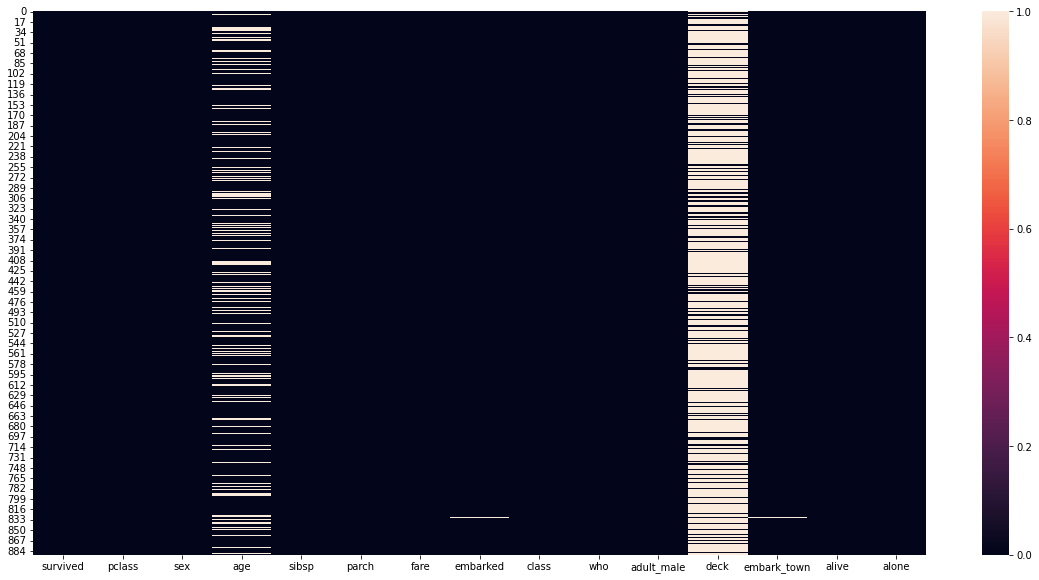

In [27]:
plt.figure(figsize=(20,10))
sn.heatmap(df.isna())

In [28]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
643,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
767,0,3,female,30.5,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
835,1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,yes,False
724,1,1,male,27.0,1,0,53.1000,S,First,man,True,E,Southampton,yes,False
86,0,3,male,16.0,1,3,34.3750,S,Third,man,True,NaN,Southampton,no,False
123,1,2,female,32.5,0,0,13.0000,S,Second,woman,False,E,Southampton,yes,True
701,1,1,male,35.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True


In [3]:
df.dropna(subset=['embark_town'],how='all',inplace=True)

In [35]:
df.embark_town.isna().sum()

0

In [4]:
age_mean = df.age.mean()

In [5]:
df['age'].fillna(round(age_mean,2))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    29.64
889    26.00
890    32.00
Name: age, Length: 889, dtype: float64

In [41]:
df.age.isna().sum() 


177

In [42]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df['age'] = df['age'].fillna(method='ffill')

In [45]:
df.age.isna().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         201 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [7]:
df['deck']=df['deck'].fillna(method='bfill')

In [8]:
df.dropna(subset='deck',how='all',inplace=True)

In [53]:
df.deck.isna().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     888 non-null    int64  
 1   pclass       888 non-null    int64  
 2   sex          888 non-null    object 
 3   age          888 non-null    float64
 4   sibsp        888 non-null    int64  
 5   parch        888 non-null    int64  
 6   fare         888 non-null    float64
 7   embarked     888 non-null    object 
 8   class        888 non-null    object 
 9   who          888 non-null    object 
 10  adult_male   888 non-null    bool   
 11  deck         888 non-null    object 
 12  embark_town  888 non-null    object 
 13  alive        888 non-null    object 
 14  alone        888 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 98.9+ KB


In [56]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

finding and dealing with dublicates

In [57]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
888    False
889    False
Length: 888, dtype: bool

In [61]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
313,0,3,male,28.00,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
359,1,3,female,38.00,0,0,7.8792,Q,Third,woman,False,D,Queenstown,yes,True
372,0,3,male,19.00,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
459,0,3,male,50.00,0,0,7.7500,Q,Third,man,True,E,Queenstown,no,True
494,0,3,male,21.00,0,0,8.0500,S,Third,man,True,D,Southampton,no,True
511,0,3,male,29.00,0,0,8.0500,S,Third,man,True,E,Southampton,no,True
521,0,3,male,22.00,0,0,7.8958,S,Third,man,True,B,Southampton,no,True
589,0,3,male,22.00,0,0,8.0500,S,Third,man,True,D,Southampton,no,True
601,0,3,male,24.00,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
636,0,3,male,32.00,0,0,7.9250,S,Third,man,True,B,Southampton,no,True


In [9]:
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()

0

In [66]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
888    False
889    False
Length: 870, dtype: bool

In [10]:
df.shape

(870, 15)

In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,E,Southampton,no,True


In [11]:
df.drop(columns='who',inplace=True)

In [12]:
df.shape

(870, 14)

Finding and Dealing with Outliers

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >], dtype=object)

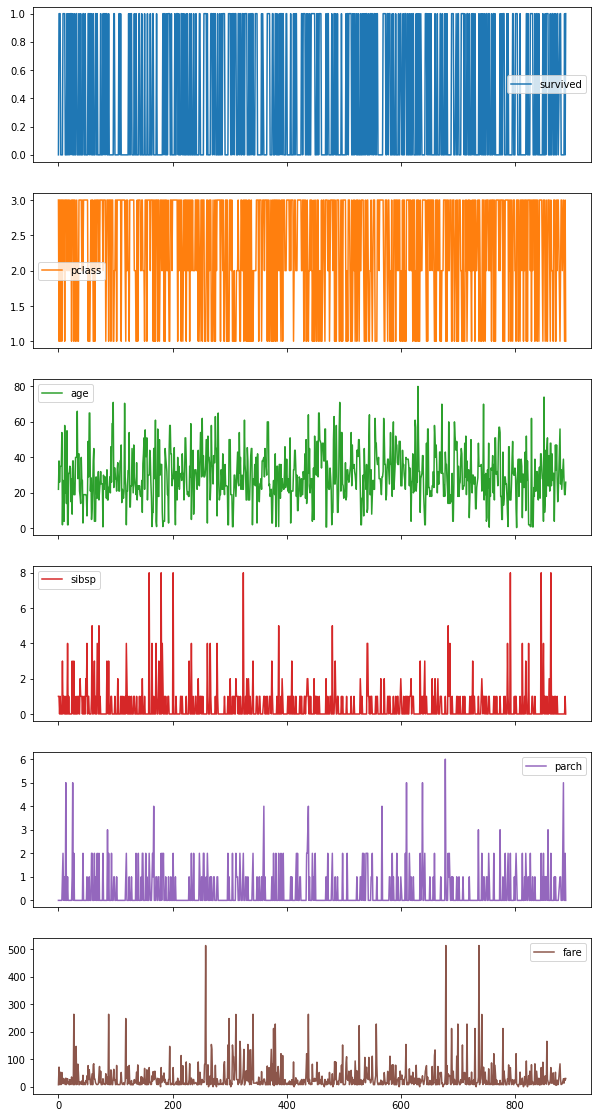

In [17]:
df.plot(subplots=True,figsize=(10,20))

In [19]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,872.00,872.00,872.00,872.00,872.00,872.00
mean,0.39,2.30,29.64,0.53,0.39,32.64
std,0.49,0.84,14.63,1.11,0.81,50.10
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.50
75%,1.00,3.00,39.00,1.00,0.00,31.28
max,1.00,3.00,80.00,8.00,6.00,512.33


<AxesSubplot: >

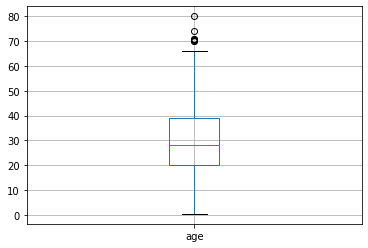

In [20]:
df.boxplot('age')

<AxesSubplot: >

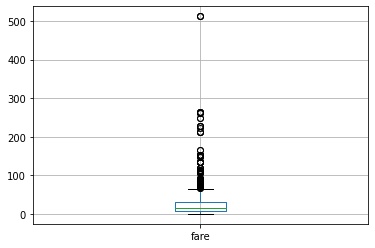

In [22]:
df.boxplot('fare')

In [13]:
df_wthout_outliers =df[(df.fare < 250)&(df.fare > 2)]

In [26]:
df_wthout_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,False,B,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,True,B,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,B,Southampton,yes,True
888,0,3,female,19.0,1,2,23.4500,S,Third,False,C,Southampton,no,False


In [28]:
df_wthout_outliers.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,848.00,848.00,848.00,848.00,848.00,848.00
mean,0.39,2.32,29.60,0.53,0.38,29.90
std,0.49,0.83,14.69,1.11,0.80,36.94
min,0.00,1.00,0.42,0.00,0.00,4.01
25%,0.00,2.00,20.00,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.50
75%,1.00,3.00,39.00,1.00,0.00,31.07
max,1.00,3.00,80.00,8.00,6.00,247.52


In [29]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
655,0,2,male,24.0,2,0,73.5000,S,Second,True,D,Southampton,no,False
457,1,1,female,65.0,1,0,51.8625,S,First,False,D,Southampton,yes,False
355,0,3,male,28.0,0,0,9.5000,S,Third,True,E,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,True,B,Cherbourg,no,True
473,1,2,female,23.0,0,0,13.7917,C,Second,False,D,Cherbourg,yes,True


In [14]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,False,B,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,True,B,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,B,Southampton,yes,True
888,0,3,female,19.0,1,2,23.4500,S,Third,False,C,Southampton,no,False


In [23]:
df.to_excel('data.xlsx')